# Data Understanding

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('sample_complaint_data_90k.csv')

In [3]:
df.head()

,text,category
0,7 senedir müşterisi olduğum Yapı Kredi Bankası...,kredi-karti
1,Öğrencilik hayatım boyunca kullandığım İş'te ü...,kredi-karti
2,03/04/2015 tarihli kredi kart ekstremde 76 TL ...,kredi-karti
3,Bu nasıl iş yapmak! 30 dk. müşteri temsilcisiy...,kredi-karti
4,Ziraat Bankası'ndan yeni bir kredi kartı aldım...,kredi-karti


In [4]:
print("Data shape :",df.shape)

Data shape : (90000, 2)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      90000 non-null  object
 1   category  90000 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [6]:
df.describe()

,text,category
count,90000,90000
unique,90000,6
top,Ziraat bankasi maaş müşterisi olmama rağmen gü...,musteri-hizmetleri
freq,1,15000


# Data Preprocessing

Missing Value

In [7]:
column_names = df.columns
for column in column_names:
    print(column + ' - ' + str(df[column].isnull().sum()))

text - 0
category - 0


In [8]:
df['category'].value_counts(ascending=True)

kredi-karti           15000
iptal                 15000
iade                  15000
hesap                 15000
kredi                 15000
musteri-hizmetleri    15000
Name: category, dtype: int64

In [9]:
pip install wordcloud

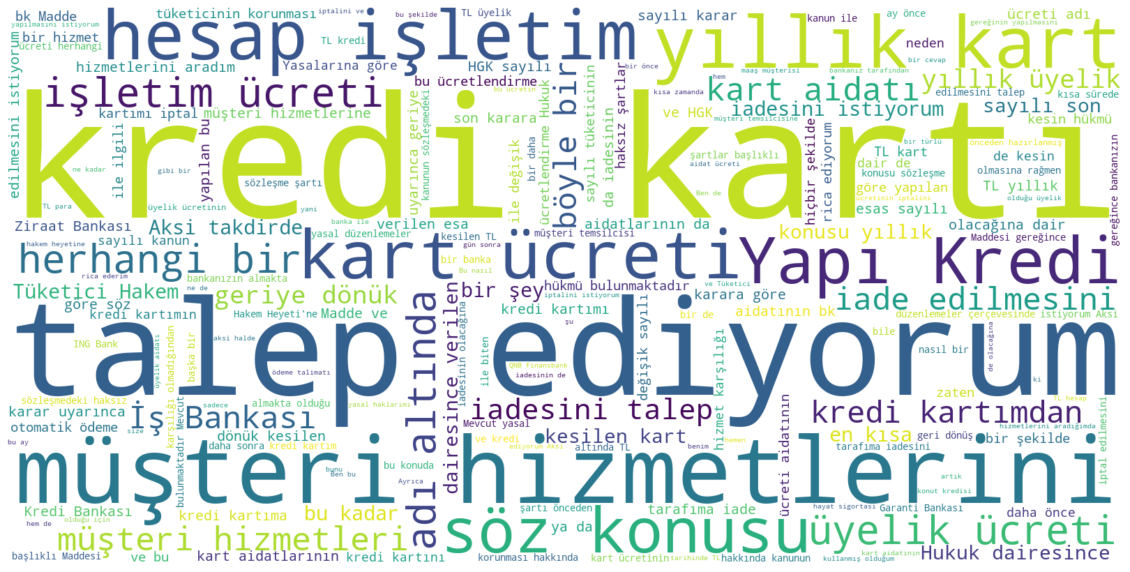

In [10]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = []
for i in df['text']:
    text.append(i)#burada kelimeleri textin içerisine ekliyoruz ve bunlar şu şekilde arraylar oluyorlar ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Şimdi array deki her bir kelimeyi birleştirip bu şekle geitiriyoruz [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words("turkish")

In [14]:
x = df.text.values
y = df.category.values

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y) #Modeli hem uygulasın hem de sonucu yeniden içine yazsın
print(y)


[4 4 4 ... 3 3 3]


In [16]:
print(x)

["7 senedir müşterisi olduğum Yapı Kredi Bankası'nın geçen ay (Temmuz) kredi kartım üzerinden Trendyol.com markası aracılığı ile Bin liralık bir harcama gerçekleştirilmiş. Herhangi bir bilgim olmadığını dile getirdim ve harcama itirazında bulundum. Satışı gerçekleştiren firma aracılığı ile satın alan kişinin bilgileri ile birlikte Cumhuriyet Savcılığında Suç duyurusunda bulundum. Ardından kredi kartıma yapılan harcama miktarları geri iade edildi. Kalan borcumu da bitirip kartı iptal ettirdim. İçerisinde artık 2  TL bir miktar kalmıştı. Bugün banka çalışanı beni aradı ve İtirazda bulunduğum için bu miktarı ödemeyeceklerini söyledi. 2 TL'değil de 2 Bin  TL olsaydı? Düpedüz benim paramı alıyorlar."
 'Öğrencilik hayatım boyunca kullandığım İş\'te üniversiteli kredi kartıma ilk aydan itibaren alınan tüm aidatların ivedilikle iadesini talep ediyorum. Kartın İş Bankası resmi sitesindeki tanıtımından alıntı bir kısım aşağıda yer alıyor... "İş\'te Üniversiteli Aidatsız kredi kartı ile; Yıllık k

In [17]:
text_data = x.copy()

# Training and Testing

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 5, stop_words=stop, ngram_range=(1,3))
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 3), preprocessor=None,
                stop_words=['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki',
                            'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok',
                            'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer',
                            'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç',
                            'için', 'ile', 'ise', 'kez', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
BoW = vectorizer.transform(X_train)
repr(BoW)

"<67500x168178 sparse matrix of type '<class 'numpy.int64'>'\n\twith 6791920 stored elements in Compressed Sparse Row format>"

In [21]:

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [23]:
X_train.shape


(67500, 168178)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)


classifier_r = RandomForestClassifier()
classifier_r.fit(X_train, y_train)
score_r = classifier_r.score(X_test, y_test)

classifier_b = xgb.XGBClassifier(seed = 82)
classifier_b.fit(X_train, y_train)
score_b = classifier_b.score(X_test, y_test)

print("Accuracy:", score)

print("Logistic Regression başarı:", score, "\nRandom Forest Classifier başarı:" ,score_r, "\nxgb başarı:",score_b)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.7472888888888889
Logistic Regression başarı: 0.7472888888888889 
Random Forest Classifier başarı: 0.7484888888888889 
xgb başarı: 0.7937777777777778


In [25]:
from sklearn.externals import joblib

joblib.dump(classifier_b,"latest_model.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['latest_model.pkl']

In [26]:
best_model = joblib.load("latest_model.pkl")
final_test_prediction = best_model.score(X_test,y_test)
print("Final Test Score:",final_test_prediction)

Final Test Score: 0.7937777777777778


# Metrics

In [27]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


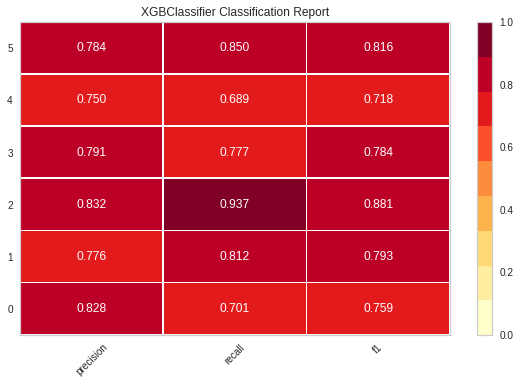

In [37]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(best_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()